<a href="https://colab.research.google.com/github/GaryM02/big-data-project/blob/main/big_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Objectives

1. What is the distribution between a players rating and their position?
2. What is the distribution of Players who kick with their left foot and their rating?
3. Does rating have any correlation to height, foot, position etc. ?
4. Are goalkeepers on average taller than outfield players?
5. Do outfield players have a higher average rating than goalkeepers?
6. Does outfield players positions have any affect on rating?



# Data Collection and Cleaning

In [113]:
import pandas as pd

# Load the FIFA dataset into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/GaryM02/big-data-project/main/fifa.csv')


In [77]:
df = df.rename(columns={' id': 'id'})
df = df.rename(columns={' name': 'name'})
df = df.rename(columns={' rating': 'rating'})
df = df.rename(columns={' position': 'position'})
df = df.rename(columns={' height': 'height'})
df = df.rename(columns={' foot': 'foot'})
df = df.rename(columns={' rare': 'rare'})
df = df.rename(columns={' pace': 'pace'})
df = df.rename(columns={' shooting': 'shooting'})
df = df.rename(columns={' passing': 'passing'})
df = df.rename(columns={' shooting': 'shooting'})
df = df.rename(columns={' dribbling': 'dribbling'})
df = df.rename(columns={' defending': 'defending'})
df = df.rename(columns={' heading': 'heading'})
df = df.rename(columns={' diving': 'diving'})
df = df.rename(columns={' handling': 'handling'})
df = df.rename(columns={' kicking': 'kicking'})
df = df.rename(columns={' reflexes': 'reflexes'})
df = df.rename(columns={' speed': 'speed'})
df = df.rename(columns={' positioning': 'positioning'})
df = df.rename(columns={' shooting': 'shooting'})


In [78]:
import matplotlib.pyplot as plt

## What is the distribution between a players rating and their position?

In [79]:
# Group the data by position and calculate the mean, median, and standard deviation of the overall ratings
grouped_data = df.groupby('position')['rating'].agg(['mean', 'median', 'std'])

In [80]:
# Print the results
print(grouped_data)

               mean  median       std
position                             
 A        67.260807    67.0  7.271735
 D        66.059055    66.0  6.764867
 GK       65.918280    66.0  7.673490
 M        67.087142    67.0  7.173322


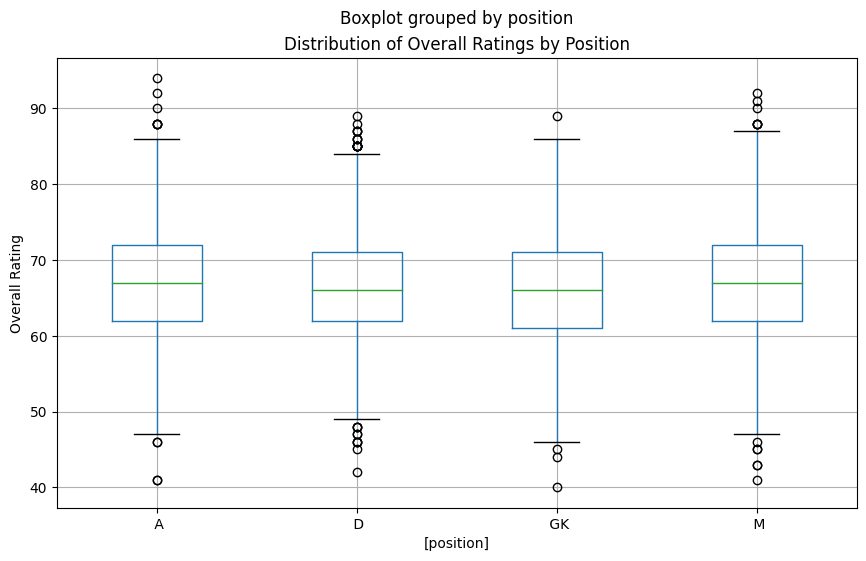

In [81]:
# Create a box plot to visualize the distribution of overall ratings by position
df.boxplot(column=['rating'], by=['position'], figsize=(10, 6))
plt.title('Distribution of Overall Ratings by Position')
plt.ylabel('Overall Rating')
plt.show()

Our box plot suggests that the data is not skewed. Additionally, if the means of the different groups are similar, this indicates that there is no significant difference between the groups. This means that the central tendency and the variability of the data is consistent across all the groups, and there is no bias towards one particular group. If we look at our box plot we can see our green line representing our medians do not fall outside the interquartile range of the other groups.

## What is the distribution of Players who kick with their left foot?

In [110]:
# Group the data by position and calculate the mean, median, and standard deviation of the overall ratings
grouped_data = df.groupby('foot')['rating'].agg(['mean', 'median', 'std'])

In [111]:
# Print the results
print(grouped_data)

             mean  median       std
foot                               
 Left   66.924006    66.0  6.740460
 Right  66.718381    66.0  7.186522


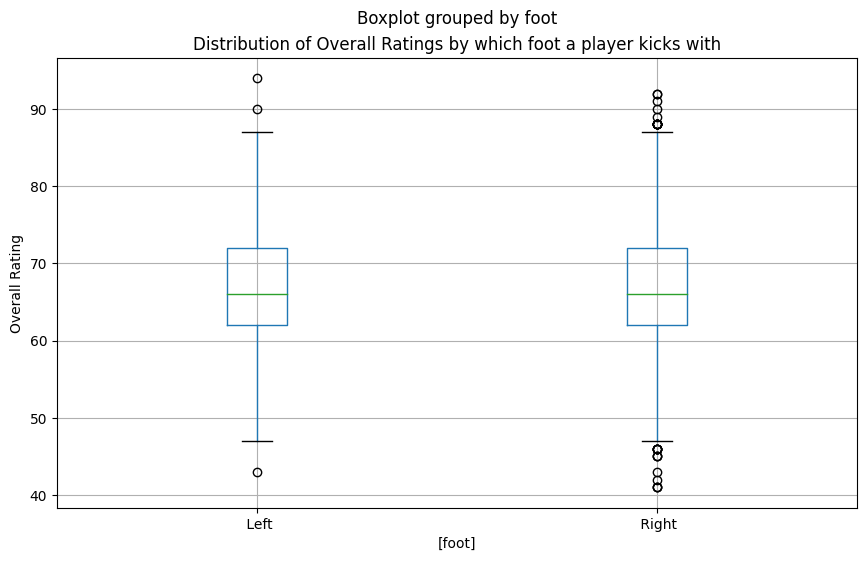

In [112]:
# Create a box plot to visualize the distribution of overall ratings by position
df.boxplot(column=['rating'], by=['foot'], figsize=(10, 6))
plt.title('Distribution of Overall Ratings by which foot a player kicks with')
plt.ylabel('Overall Rating')
plt.show()

Our box plot suggests that the data is not skewed. Additionally, if the means of the different groups are similar, this indicates that there is no significant difference between the groups. This means that the central tendency and the variability of the data is consistent across all the groups, and there is no bias towards one particular group. If we look at our box plot we can see our green line representing our medians do not fall outside the interquartile range of the other groups.

## Organising data-types and accounting for Null attributes
In this section the column data-types are observed and adjusted to better represent the data collected for analysis and to reduce memory usage.

The data-frame will be split into two copies:

df - outfielders dataframe

gk_df - goalkeepers dataframe

In [83]:
# Print the data types of each column
print(df.dtypes)

id               int64
name            object
rating           int64
position        object
height           int64
foot            object
rare             int64
pace            object
shooting        object
passing         object
dribbling       object
defending       object
heading         object
diving          object
handling        object
kicking         object
reflexes        object
speed           object
positioning    float64
dtype: object


In [85]:
gk_df = df[['name', 'rating', 'position', 'height', 'foot', 'rare', 'diving', 'handling', 'kicking', 'reflexes', 'speed', 'positioning']].copy()
gk_df = gk_df.drop(gk_df[(gk_df.position != ' GK')].index)
print(gk_df.head())

df = df.drop(['id', 'diving', 'handling', 'kicking', 'reflexes', 'speed', 'positioning'], axis=1)


                  name  rating position  height    foot  rare diving handling  \
0         Gábor Király      69       GK     191   Right     0     70       66   
20          Paul Smith      64       GK     193   Right     1     65       62   
29   Stefanos Kotsolis      65       GK     190   Right     0     62       68   
31      Steve Phillips      61       GK     185   Right     1     46       65   
39         Oka Nikolov      70       GK     188   Right     0     72       64   

   kicking reflexes speed positioning  
0       63       74    35        66.0  
20      55       67    41        62.0  
29      62       65    60        64.0  
31      76       71    31        61.0  
39      59       73    61        73.0  


In [86]:
df = df.drop(df[(df.position == ' GK')].index)
print(df.head())

                      name  rating position  height    foot  rare pace  \
1             Frederik Boi      65        M     184   Right     0   61   
2          Tomasz Szewczuk      57        A     185   Right     0   65   
3   Steeve Joseph-Reinette      63        D     180    Left     0   68   
4             Kamel Chafni      72        M     181   Right     0   75   
5           Abdoulaye Faye      72        D     187   Right     1   50   

  shooting passing dribbling defending heading  
1       65      63        59        62      62  
2       54      43        53        55      74  
3       38      51        46        64      71  
4       64      67        72        57      66  
5       37      47        43        76      82  


In [90]:
df['name'] = df['name'].astype(str)
df['rating'] = df['rating'].astype('int16')
df['position'] = df['position'].astype(str)
df['height'] = df['height'].astype('int16')
df['foot'] = df['foot'].astype(str)
df['rare'] = df['rare'].astype('uint8')
df['pace'] = df['pace'].astype('uint8')
df['shooting'] = df['shooting'].astype('uint8')
df['passing'] = df['passing'].astype('uint8')
df['dribbling'] = df['dribbling'].astype('uint8')
df['defending'] = df['defending'].astype('uint8')
df['heading'] = df['heading'].astype('uint8')

# Print the data types of each column
print(df.dtypes)

name         object
rating        int16
position     object
height        int16
foot         object
rare          uint8
pace          uint8
shooting      uint8
passing       uint8
dribbling     uint8
defending     uint8
heading       uint8
dtype: object


In [97]:
gk_df['diving'] = gk_df['diving'].astype('uint8')
gk_df['handling'] = gk_df['handling'].astype('uint8')
gk_df['kicking'] = gk_df['kicking'].astype('uint8')
gk_df['reflexes'] = gk_df['reflexes'].astype('uint8')
gk_df['speed'] = gk_df['speed'].astype('uint8')
gk_df['positioning'] = gk_df['positioning'].astype('float16')
# Print the data types of each column
print(gk_df.dtypes)

name            object
rating           int16
position        object
height           int16
foot            object
rare             uint8
diving           uint8
handling         uint8
kicking          uint8
reflexes         uint8
speed            uint8
positioning    float16
dtype: object


## Calculating correlation coefficients

Calculating correlation coefficients between overall rating and individual attributes such as pace, shooting, passing, and dribbling is a useful way to examine whether there is any correlation between overall rating and other player attributes in the FIFA dataset. A correlation coefficient ranges between -1 and 1, with 0 indicating no correlation, -1 indicating a perfect negative correlation, and 1 indicating a perfect positive correlation. A correlation coefficient close to 1 or -1 suggests a strong correlation between the two variables, while a coefficient close to 0 suggests little or no correlation.

Creating scatter plots is another way to visualize the relationship between overall rating and each attribute. By plotting the values of each attribute on the x-axis and the corresponding overall rating on the y-axis, we can see whether there is a clear pattern or trend in the data. If there is a strong positive correlation, we would expect to see a diagonal line sloping upwards from left to right. If there is a strong negative correlation, we would expect to see a diagonal line sloping downwards from left to right. If there is no correlation, we would expect to see a scatter of points with no clear pattern.

Overall, examining correlations between overall rating and individual attributes is a useful way to gain insights into how the different attributes contribute to a player's overall rating. It can also help identify which attributes are most important for certain positions or playing styles.

### Outfielders

In [98]:
# calculate correlation coefficients matrix
correlations = df.corr()

print(correlations)

             rating    height      rare      pace  shooting   passing  \
rating     1.000000 -0.002019  0.251950  0.265640  0.541683  0.633406   
height    -0.002019  1.000000 -0.023979 -0.392051 -0.219175 -0.273012   
rare       0.251950 -0.023979  1.000000  0.276355  0.244903  0.126480   
pace       0.265640 -0.392051  0.276355  1.000000  0.360584  0.260352   
shooting   0.541683 -0.219175  0.244903  0.360584  1.000000  0.558012   
passing    0.633406 -0.273012  0.126480  0.260352  0.558012  1.000000   
dribbling  0.539971 -0.401063  0.227765  0.573711  0.783148  0.656681   
defending  0.387013  0.356490 -0.057604 -0.291526 -0.239953  0.228389   
heading    0.439104  0.367099  0.051384 -0.113837  0.031571  0.005945   

           dribbling  defending   heading  
rating      0.539971   0.387013  0.439104  
height     -0.401063   0.356490  0.367099  
rare        0.227765  -0.057604  0.051384  
pace        0.573711  -0.291526 -0.113837  
shooting    0.783148  -0.239953  0.031571  
passi

<ipython-input-98-bea57e9ce15e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


### Goalkeepers

In [100]:
# calculate correlation coefficients matrix
gk_correlations = gk_df.corr()

print(gk_correlations)

               rating    height      rare    diving  handling   kicking  \
rating       1.000000  0.099763  0.231273  0.920651  0.896627  0.702664   
height       0.099763  1.000000  0.046735  0.091859  0.112361  0.086684   
rare         0.231273  0.046735  1.000000  0.195529  0.230818  0.262367   
diving       0.920651  0.091859  0.195529  1.000000  0.742630  0.619452   
handling     0.896627  0.112361  0.230818  0.742630  1.000000  0.675943   
kicking      0.702664  0.086684  0.262367  0.619452  0.675943  1.000000   
reflexes     0.893557  0.056339  0.216361  0.858516  0.697350  0.555723   
speed        0.214803 -0.021480  0.004306  0.235284  0.142400  0.129424   
positioning  0.900010  0.084102  0.199900  0.740798  0.845211  0.637982   

             reflexes     speed  positioning  
rating       0.893557  0.214803     0.900010  
height       0.056339 -0.021480     0.084102  
rare         0.216361  0.004306     0.199900  
diving       0.858516  0.235284     0.740798  
handling     0

<ipython-input-100-dde6c4258c96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gk_correlations = gk_df.corr()


### Does rating have any correlation to an outfield players attributes?

The correlation coefficient between rating and each of the other attributes is as follows:

height: -0.002019

rare: 0.251950

pace: 0.265640

shooting: 0.541683

passing: 0.633406

dribbling: 0.539971

defending: 0.387013

heading: 0.439104

The correlation coefficients between rating and all other attributes are not close to zero, which suggests that there is a relationship between them.

In particular, we can see that the highest correlation coefficients are with passing, dribbling, and shooting, indicating that these attributes may have a stronger influence on a player's overall rating.

### Does rating have any correlation to a goalkeepers attributes?

There is a strong positive correlation between rating and several other attributes, namely diving (0.92), handling (0.90), reflexes (0.89), and positioning (0.90). These correlations suggest that higher rated players tend to have better diving, handling, reflexes, and positioning skills compared to lower rated players.


## Are goalkeepers on average taller than outfield players?

In [103]:
outfield_mean = df['height'].mean()
goalkeeper_mean = gk_df['height'].mean()

print(f'The average height of goalkeepers: {round(goalkeeper_mean, 2)} cm')
print(f'The average height of outfield players: {round(outfield_mean, 2)} cm')

The average height of goalkeepers: 188.23 cm
The average height of outfield players: 180.99 cm


To check if goalkeepers are on average taller, we calculated the average height of goalkeepers and outfield players using their respective height data in a dataframe. The average height of goalkeepers was found to be 188.23 cm, while the average height of outfield players was found to be 180.99 cm. By comparing these two means, it is evident that goalkeepers are taller on average than outfield players. The difference between the two means is about 7.24 cm

## Do outfield players have a higher average rating than goalkeepers?

In [106]:
outfield_mean = df['rating'].mean()
goalkeeper_mean = gk_df['rating'].mean()

print(f'The average rating of goalkeepers: {round(goalkeeper_mean, 2)}')
print(f'The average rating of outfield players: {round(outfield_mean, 2)}')

The average rating of goalkeepers: 65.92
The average rating of outfield players: 66.77


There is a noticeable difference between the average ratings of goalkeepers and outfield players. The average rating of goalkeepers is 65.92, while the average rating of outfield players is 66.77. The difference between the two means is approximately 0.85, which suggests that outfield players, on average, are rated slightly higher than goalkeepers.

## Does outfield players positions have any affect on rating?

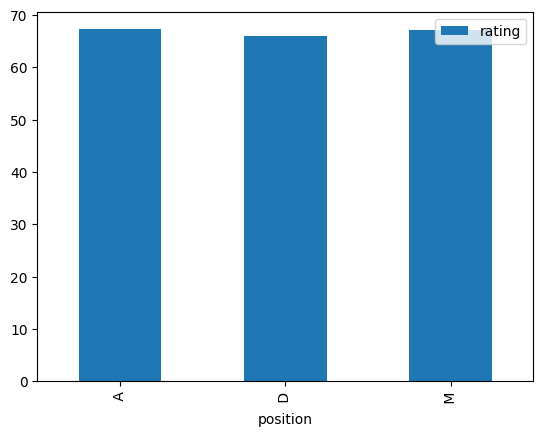

In [108]:
pivot_table = df.pivot_table(index='position', values='rating', aggfunc='mean')


pivot_table.plot(kind='bar')
plt.show()

In [109]:
from scipy.stats import f_oneway

positions = df['position'].unique()

for position in positions:
    subset = df[df['position'] == position]['rating']
    print(position, subset.mean())

f_oneway(df[df['position'] == positions[0]]['rating'],
         df[df['position'] == positions[1]]['rating'],
         df[df['position'] == positions[2]]['rating'])


 M 67.08714238737258
 A 67.26080691642652
 D 66.05905511811024


F_onewayResult(statistic=22.275725117389175, pvalue=2.2537410108207333e-10)

The results show the output of a one-way ANOVA test. The null hypothesis is that there is no significant difference in the means of the ratings between the different player positions (M, A, and D).

The output shows the mean rating for each position: 67.09 for M (midfielders), 67.26 for A (attackers), and 66.06 for D (defenders).

The F-statistic is 22.28, and the p-value is 2.25e-10, which is much smaller than the conventional threshold for statistical significance of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the mean ratings between the different player positions.

Overall, the results suggest that an outfield player's position does have a significant effect on their rating.